In [ ]:
# Set up connection to database
import psycopg2
engine = psycopg2.connect(
    database="stroke_dataset",
    user = "postgres",
    password = "bootcamp",
    host = "final-project.cpi4gz0jwsu4.us-west-1.rds.amazonaws.com",
    port = '5432'
    )

cursor = engine.cursor()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
# Pull in working dataset from database
import pandas as pd
sql = """
SELECT "FIPS", "Num_Per_100k", "State", "County", "Percent_Smokers", "Percent_Obese", "Food_Environment_Index", "Percent_Access_Exercise", "Primary_Care_Physician_Rate", "Mental_Health_Providers_Rate", "Percent_Some_College", "Percent_Unemployed", "Income_Inequality_Ratio", "Violent_Crime_Rate", "Average_Daily_Air_Polution_Particle_Matter", "Percent_Long_Commute_Drives_Alone", "Percent_Rural"
FROM public."All_Data"
"""

all_data_df = pd.read_sql(sql, con=engine)
all_data_df.head()

,FIPS,Num_Per_100k,State,County,Percent_Smokers,Percent_Obese,Food_Environment_Index,Percent_Access_Exercise,Primary_Care_Physician_Rate,Mental_Health_Providers_Rate,Percent_Some_College,Percent_Unemployed,Income_Inequality_Ratio,Violent_Crime_Rate,Average_Daily_Air_Polution_Particle_Matter,Percent_Long_Commute_Drives_Alone,Percent_Rural
0,1001.0,107.0,Alabama,Autauga,19.0,36.0,7.1,71.0,45.0,13.0,61.9,5.3,4.4,266.0,10.8,41.0,42.0
1,1003.0,82.5,Alabama,Baldwin,17.0,29.0,7.9,69.0,73.0,89.0,63.8,5.4,4.6,217.0,9.6,40.0,42.3
2,1005.0,96.1,Alabama,Barbour,22.0,44.0,5.5,53.0,42.0,8.0,39.7,8.6,5.9,329.0,10.1,35.0,67.8
3,1007.0,112.3,Alabama,Bibb,20.0,38.0,7.6,49.0,53.0,9.0,49.8,6.6,4.2,147.0,10.5,49.0,68.4
4,1009.0,96.1,Alabama,Blount,20.0,36.0,8.5,32.0,21.0,9.0,53.9,5.5,4.1,212.0,11.3,60.0,90.0


In [ ]:
all_data_df.shape

(3142, 17)

In [ ]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [ ]:
# Check for null values
all_data_df.isnull().sum()

FIPS                                            0
Num_Per_100k                                    7
State                                           0
County                                          0
Percent_Smokers                                 0
Percent_Obese                                   0
Food_Environment_Index                         19
Percent_Access_Exercise                         6
Primary_Care_Physician_Rate                   134
Mental_Health_Providers_Rate                  264
Percent_Some_College                            0
Percent_Unemployed                              1
Income_Inequality_Ratio                         2
Violent_Crime_Rate                            176
Average_Daily_Air_Polution_Particle_Matter     34
Percent_Long_Commute_Drives_Alone               0
Percent_Rural                                   7
dtype: int64

In [ ]:
# Drop null values
all_data_df = all_data_df.dropna(axis=0)

In [ ]:
# Drop identifier columns
all_data_usable_df = all_data_df.drop(["FIPS", "State", "County"], 1)
all_data_usable_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Num_Per_100k,Percent_Smokers,Percent_Obese,Food_Environment_Index,Percent_Access_Exercise,Primary_Care_Physician_Rate,Mental_Health_Providers_Rate,Percent_Some_College,Percent_Unemployed,Income_Inequality_Ratio,Violent_Crime_Rate,Average_Daily_Air_Polution_Particle_Matter,Percent_Long_Commute_Drives_Alone,Percent_Rural
0,107.0,19.0,36.0,7.1,71.0,45.0,13.0,61.9,5.3,4.4,266.0,10.8,41.0,42.0
1,82.5,17.0,29.0,7.9,69.0,73.0,89.0,63.8,5.4,4.6,217.0,9.6,40.0,42.3
2,96.1,22.0,44.0,5.5,53.0,42.0,8.0,39.7,8.6,5.9,329.0,10.1,35.0,67.8
3,112.3,20.0,38.0,7.6,49.0,53.0,9.0,49.8,6.6,4.2,147.0,10.5,49.0,68.4
4,96.1,20.0,36.0,8.5,32.0,21.0,9.0,53.9,5.5,4.1,212.0,11.3,60.0,90.0


In [ ]:
# Check for null values
all_data_df.isnull().sum()

FIPS                                          0
Num_Per_100k                                  0
State                                         0
County                                        0
Percent_Smokers                               0
Percent_Obese                                 0
Food_Environment_Index                        0
Percent_Access_Exercise                       0
Primary_Care_Physician_Rate                   0
Mental_Health_Providers_Rate                  0
Percent_Some_College                          0
Percent_Unemployed                            0
Income_Inequality_Ratio                       0
Violent_Crime_Rate                            0
Average_Daily_Air_Polution_Particle_Matter    0
Percent_Long_Commute_Drives_Alone             0
Percent_Rural                                 0
dtype: int64

In [ ]:
all_data_usable_df.shape

(2645, 14)

In [ ]:
# https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
# divide data into attributes and labels

X = all_data_usable_df.iloc[:, 0:13].values
y = all_data_usable_df.iloc[:, 0].values

In [ ]:
# divide data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# train random forest algorithm to solve this regression problem

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05077504725897904
Mean Squared Error: 0.0935166351606803
Root Mean Squared Error: 0.30580489721500587


In [ ]:
# increase estimators to 50

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03847258979206545
Mean Squared Error: 0.0369494291115313
Root Mean Squared Error: 0.19222234290407372


In [ ]:
# increase estimators to 30

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04548204158790325
Mean Squared Error: 0.0670331442974165
Root Mean Squared Error: 0.2589075979908981


In [ ]:
df2 = all_data_usable_df["Num_Per_100k"].mean()
df2

75.97550094517943

In [ ]:
# look at data from first 6 columns only
X = all_data_usable_df.iloc[:, 0:5].values
y = all_data_usable_df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03296786389414362
Mean Squared Error: 0.027476580550304608
Root Mean Squared Error: 0.165760612180049


In [ ]:
# look at data from first 2 columns only
X = all_data_usable_df.iloc[:, 0:1].values
y = all_data_usable_df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.025809703843741254
Mean Squared Error: 0.03271900861163616
Root Mean Squared Error: 0.18088396449557423


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


ValueError: ignored

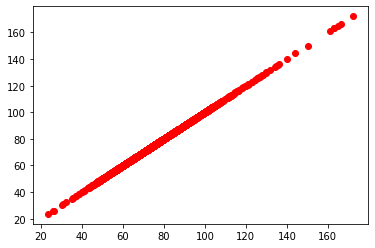

In [ ]:
# https://builtin.com/data-science/random-forest-python


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid)))
plt.scatter(X, y, c='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.xlabel('smoking %')
plt.ylabel('stroke pred')
plt.show()